<a href="https://colab.research.google.com/github/Deyonrose/S5_PredictiveAnalysis/blob/main/2348513_PA_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Loading the dataset**

In [ ]:
df = pd.read_excel('/content/Online Retail.xlsx')

**Q1: Data Cleaning and Preparation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Q1.1**

In [ ]:
# Q1.1 Finding the missing value
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Handling missing values
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

In [ ]:
# checking
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# Q1.1 Removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Q1.1 Removing irrelevant data
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

**Q1.2 Descriptive statistics**

In [ ]:
# Descriptive statistics
print(df[['Quantity', 'UnitPrice']].describe())

            Quantity      UnitPrice
count  392692.000000  392692.000000
mean       13.119702       3.125914
std       180.492832      22.241836
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


**INTERPRETATION**

**Q1.1**

*   In the above online retail data there was about 1454 missing values in
the description column and 135080 missing value in the customer Id column
*  First we handled the missing values using the function dropna() then rechecked again

*  Secondly removed the duplicate values
*  Then removed the irrevalent values in the quantity and unitprice

**Q1.2**

*   We had done a descriptive statistics on the quantity and unit price which include mean,std etc..






**Q2. Sales Analysis**

In [ ]:
# Q2.1 Top 10 best-selling products by quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [ ]:
# Q2.2 Total revenue by product
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
total_revenue = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
print(total_revenue)


Description
PAPER CRAFT , LITTLE BIRDIE           168469.600
REGENCY CAKESTAND 3 TIER              142264.750
WHITE HANGING HEART T-LIGHT HOLDER    100392.100
JUMBO BAG RED RETROSPOT                85040.540
MEDIUM CERAMIC TOP STORAGE JAR         81416.730
                                         ...    
PURPLE FRANGIPANI HAIRCLIP                 0.850
VINTAGE BLUE TINSEL REEL                   0.840
SET 12 COLOURING PENCILS DOILEY            0.650
HEN HOUSE W CHICK IN NEST                  0.420
PADS TO MATCH ALL CUSHIONS                 0.003
Name: TotalSales, Length: 3877, dtype: float64


**Visualization of product sales**

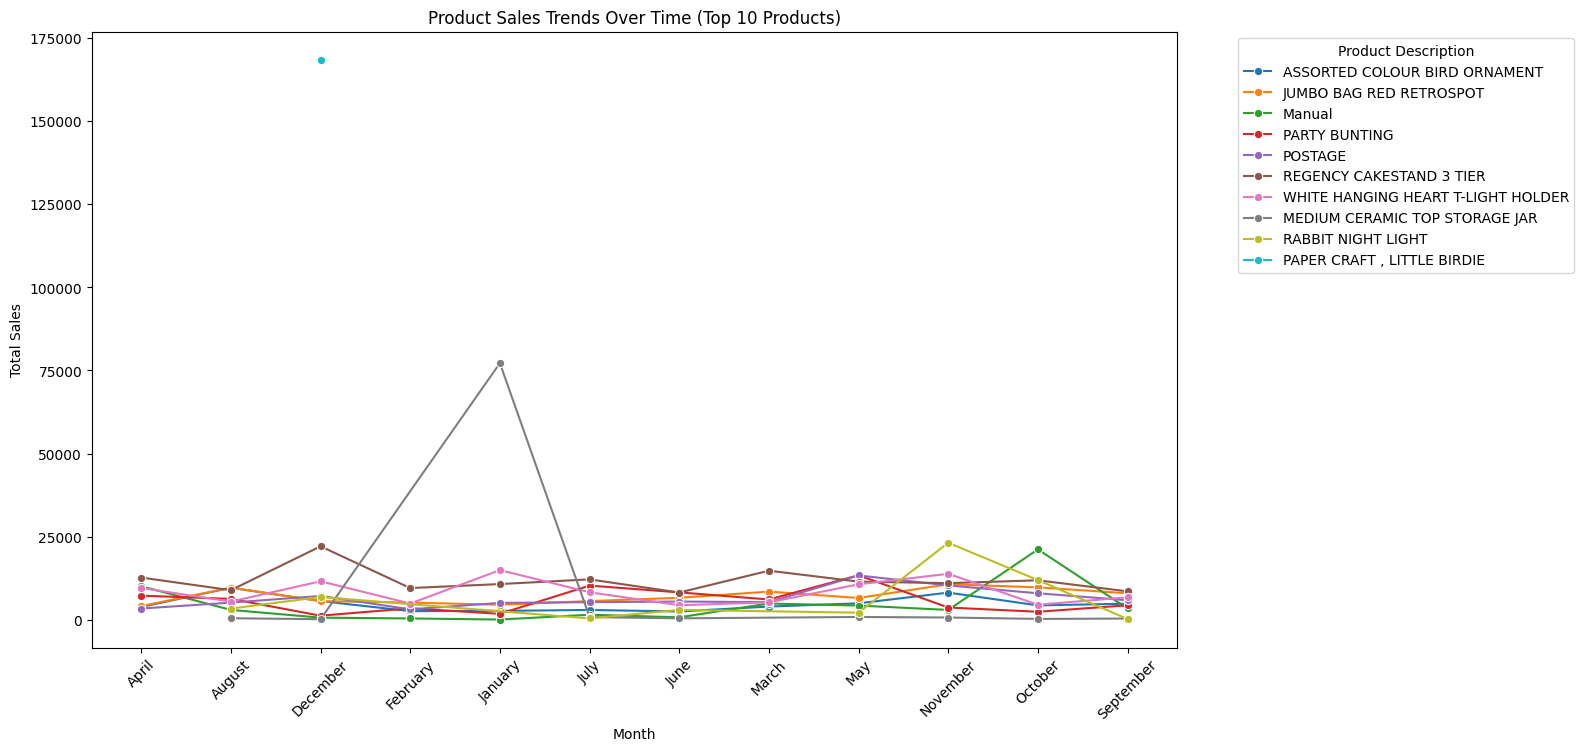

In [ ]:
# Calculate total sales by month and product
df['Month'] = df['InvoiceDate'].dt.month_name()

# Get the top 10 products by total sales
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10).index

# Filter product_sales_trends to include only the top 10 products
product_sales_trends = df[df['Description'].isin(top_products)].groupby(['Month', 'Description'])['TotalSales'].sum().reset_index()

# Visualization of Product Sales Trends for Top 10 Products
plt.figure(figsize=(14, 8))
sns.lineplot(data=product_sales_trends, x='Month', y='TotalSales', hue='Description', marker="o")
plt.xticks(rotation=45)
plt.title('Product Sales Trends Over Time (Top 10 Products)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Product Description')
plt.show()

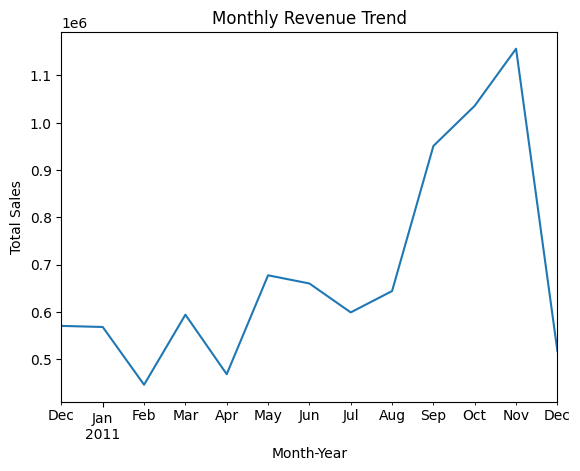

In [ ]:
# Q2.3 Monthly revenue trend
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_trend = df.groupby('MonthYear')['TotalSales'].sum()
monthly_trend.plot(kind='line')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.show()

**INTERPRETATION**

*  The top 10  best selling products includes PAPER CRAFT , LITTLE BIRDIE with quantity of 80995,MEDIUM CERAMIC TOP STORAGE JAR  with sale of 77916 and others
*   The top revenue generated products are PAPER CRAFT , LITTLE BIRDIE  with  168469.600 and REGENCY CAKESTAND 3 TIER with 142264.750

*  The least revenue by PADS TO MATCH ALL CUSHIONS with 0.003
*   November got the highest revenue





**Q3. Customer Behaviour**

In [ ]:
# Q3.1 Number of unique customers
unique_customers = df['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")

# Q3.1 Percentage of sales by repeat customers
repeat_customers = df[df.duplicated(subset=['CustomerID'], keep=False)]['CustomerID'].nunique()
repeat_percentage = (repeat_customers / unique_customers) * 100
print(f"Percentage of sales by repeat customers: {repeat_percentage:.2f}%")

Number of unique customers: 4338
Percentage of sales by repeat customers: 98.36%


In [ ]:
# Q3.2 Average order value (total sales per invoice)

# Calculate total sales per invoice
invoice_total_sales = df.groupby('InvoiceNo')['TotalSales'].sum().reset_index()

# Calculate average order value (AOV) for all invoices
average_order_value = invoice_total_sales['TotalSales'].mean()
print(f"Overall Average Order Value: {average_order_value:.2f}")

# Q3.2 How does this vary across different customer segments (e.g., country-wise)

# Average Order Value (AOV) across different customer segments (country-wise)
country_invoice_total = df.groupby(['Country', 'InvoiceNo'])['TotalSales'].sum().reset_index()

# Calculate the average order value for each country
country_aov = country_invoice_total.groupby('Country')['TotalSales'].mean().sort_values(ascending=False).reset_index()
country_aov.columns = ['Country', 'AverageOrderValue']
print(country_aov)

Overall Average Order Value: 479.56
                 Country  AverageOrderValue
0              Singapore        3039.898571
1            Netherlands        3036.663191
2              Australia        2429.014211
3                  Japan        1969.282632
4                Lebanon        1693.880000
5                 Israel        1443.168000
6                 Brazil        1143.600000
7            Switzerland        1106.744118
8                 Sweden        1065.773056
9                Denmark        1053.074444
10                  EIRE        1020.240231
11                Norway        1004.595556
12                   RSA        1002.310000
13                Greece         952.104000
14                Cyprus         843.928125
15       Channel Islands         786.174615
16                   USA         716.078000
17                 Spain         683.984000
18  United Arab Emirates         634.093333
19               Iceland         615.714286
20                Canada         611.063

                 Country   TotalSales
35        United Kingdom  7285024.644
23           Netherlands   285446.340
10                  EIRE   265262.460
14               Germany   228678.400
13                France   208934.310
0              Australia   138453.810
30                 Spain    61558.560
32           Switzerland    56443.950
3                Belgium    41196.340
31                Sweden    38367.830
19                 Japan    37416.370
24                Norway    36165.440
26              Portugal    33375.840
12               Finland    22546.080
29             Singapore    21279.290
6        Channel Islands    20440.540
9                Denmark    18955.340
18                 Italy    17483.240
7                 Cyprus    13502.850
1                Austria    10198.680
25                Poland     7334.650
17                Israel     7215.840
15                Greece     4760.520
16               Iceland     4310.000
5                 Canada     3666.380
33          

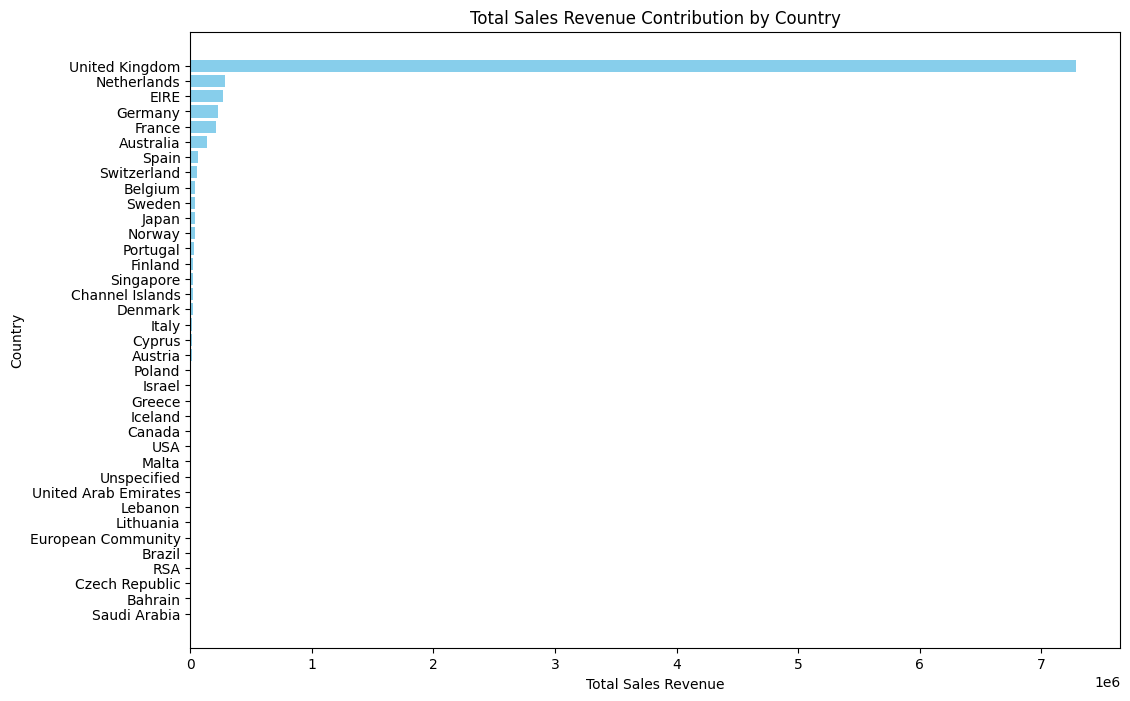

In [ ]:
# Q3.3 Which countries contribute the most to sales revenue

# Calculate total sales revenue by country
country_revenue = df.groupby('Country')['TotalSales'].sum().reset_index()

# Sort countries by total sales revenue in descending order
country_revenue = country_revenue.sort_values(by='TotalSales', ascending=False)
print(country_revenue)

# Visualization of countries contributing the most to sales revenue
plt.figure(figsize=(12, 8))
plt.barh(country_revenue['Country'], country_revenue['TotalSales'], color='skyblue')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Country')
plt.title('Total Sales Revenue Contribution by Country')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

**INTERPRETATION**

1.   Number of unique customers was 4338 and Percentage of sales by repeat customers: 98.36%
1.   Overall Average Order Value: 479.56
2. Singapore has highest order value of 3039.898571 and  Saudi Arabia  has the least of 145.920000

2. The  Total Sales Revenue Contribution by Country was calculated in that the highest by United Kingdom with 7285024.644 and Saudi Arabia  least of  145.920



**Q4. Product Performance**

In [ ]:
# Q4.1 Top 5 countries with highest average revenue per transaction
country_revenue = df.groupby(['Country', 'InvoiceNo'])['TotalSales'].sum().groupby(level=0).mean().sort_values(ascending=False).head(5)
print(country_revenue)

Country
Singapore      3039.898571
Netherlands    3036.663191
Australia      2429.014211
Japan          1969.282632
Lebanon        1693.880000
Name: TotalSales, dtype: float64


In [ ]:
# Q4.2 Seasonal performance of products

# Adding a  Month column
df['Month'] = df['InvoiceDate'].dt.month_name()

# Group by Month and Description to calculate total sales
seasonal_performance = df.groupby(['Month', 'Description'])['TotalSales'].sum().reset_index()

# Find top 5 products with the highest sales in each month
top_products_each_month = seasonal_performance.sort_values('TotalSales', ascending=False).groupby('Month').head(5)

# Display the results
print("The top products with High Sales in Specific Months:")
print(top_products_each_month)

The top products with High Sales in Specific Months:
           Month                          Description  TotalSales
6479    December          PAPER CRAFT , LITTLE BIRDIE   168469.60
10975    January       MEDIUM CERAMIC TOP STORAGE JAR    77183.60
15824       June       PICNIC BASKET WICKER 60 PIECES    39619.50
23011   November                   RABBIT NIGHT LIGHT    23190.41
6834    December             REGENCY CAKESTAND 3 TIER    22113.78
25375    October                               Manual    21183.63
22803   November      PAPER CHAIN KIT 50'S CHRISTMAS     16109.51
11897    January   WHITE HANGING HEART T-LIGHT HOLDER    14962.05
18354      March             REGENCY CAKESTAND 3 TIER    14784.65
23806   November   WHITE HANGING HEART T-LIGHT HOLDER    13849.93
20338        May                        PARTY BUNTING    13408.25
20484        May                              POSTAGE    13358.75
1606       April             REGENCY CAKESTAND 3 TIER    12721.50
13662       July       

**INTERPRETATION**

* The top 5 countries with highest average revenue per transaction includes Singapore ,Netherlands ,Australia    Japan,Lebanon  and Singapore is the highest with 3039.898571
*   papercraft has highest sale in december with 6479,medium ceramic in january with 10975



